# Zadanie 7
Wczytaj zbiór danych zawierający dane o wynikach testów psychologicznych. Zastosuj różne
techniki redukcji wymiarowości, takie jak PCA, NMF i t-SNE. Porównaj wyniki redukcji wymiarowości na wykresie, aby zobaczyć, która technika najlepiej separuje dane w nowej przestrzeni.

In [1]:
from sklearn.datasets import fetch_20newsgroups
import  pandas as pd
import  numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
df = pd.read_csv('data/data-final.csv', sep='\t')
df = df.dropna(how='all')
rows_with_none = df[df.apply(lambda row: row.astype(str).str.contains('NONE').any(), axis=1)]
df = df.drop(rows_with_none.index)
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4,1,5,2,5,1,5,2,4,1,...,2016-03-03 02:01:01,768,1024,9,234,6,1,GB,51.5448,0.1991
1,3,5,3,4,3,3,2,5,1,5,...,2016-03-03 02:01:20,1360,768,12,179,11,1,MY,3.1698,101.706
2,2,3,4,4,3,2,1,3,2,5,...,2016-03-03 02:01:56,1366,768,3,186,7,1,GB,54.9119,-1.3833
3,2,2,2,3,4,2,2,4,1,4,...,2016-03-03 02:02:02,1920,1200,186,219,7,1,GB,51.75,-1.25
4,3,3,3,3,5,3,3,5,3,4,...,2016-03-03 02:02:57,1366,768,8,315,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27350,1,5,1,4,2,2,1,4,1,5,...,2016-03-24 10:44:11,1920,1080,2,172,7,1,AM,40.0,45.0
27351,3,3,4,2,0,3,4,3,3,3,...,2016-03-24 10:44:14,1366,768,8,271,17,2,US,38.0,-97.0
27352,3,3,4,4,3,2,3,5,1,5,...,2016-03-24 10:45:33,1280,1024,17,191,10,2,US,27.1678,-80.2662
27353,3,4,3,4,2,2,1,4,4,4,...,2016-03-24 10:47:59,1440,900,25,115,17,1,US,42.0039,-87.9703


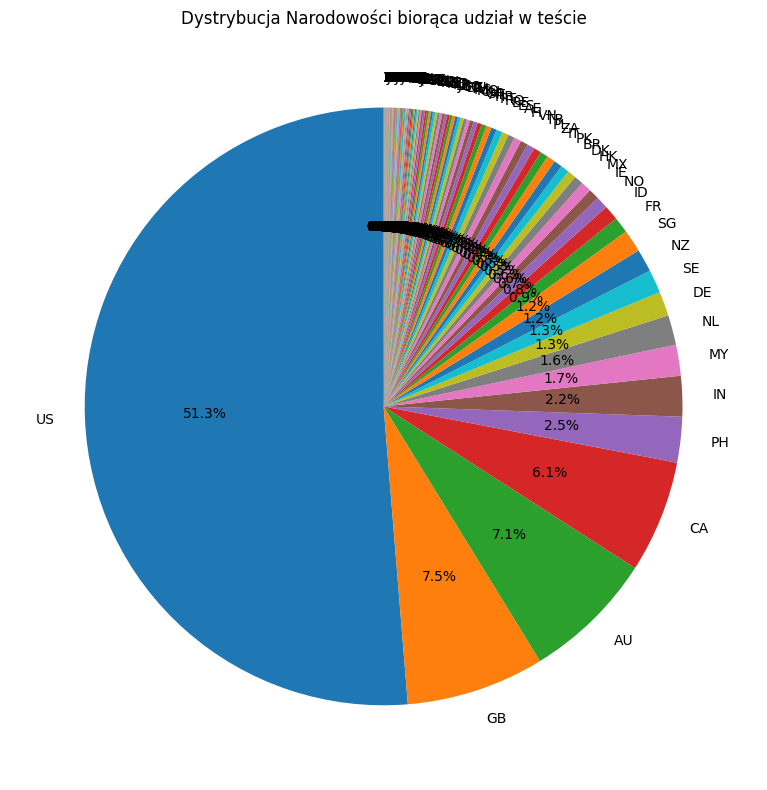

In [11]:
# Tworzenie wykresu kołowego
plt.figure(figsize=(8, 8))
plt.pie(df['country'].value_counts(), labels=df['country'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Dystrybucja Narodowości biorąca udział w teście')
plt.tight_layout()
plt.show()

In [12]:
# Stosowanie PCA
pca = PCA(n_components=2)
# Dopasowanie PCA do danych i transformacja
test_data = df.loc[:, (df.columns != 'country') & (df.columns != 'dateload')]
X_pca = pca.fit_transform(test_data)
# Wyświetlenie nowych danych po zastosowaniu PCA
print("Nowe dane po zastosowaniu PCA:")
print(X_pca)

Nowe dane po zastosowaniu PCA:
[[-71538.8300039  -13719.90104202]
 [-73813.17085902 -16235.36802783]
 [-76427.71461379 -17214.48515346]
 ...
 [-78246.20517482 -13703.92177192]
 [-74662.69559594 -16327.12621145]
 [-77989.81684866 -15970.85014932]]


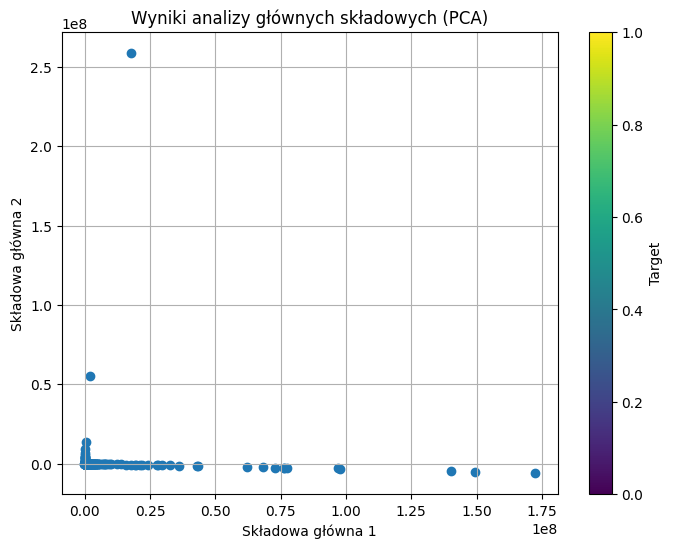

In [13]:
# Wykres wyników PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('Wyniki analizy głównych składowych (PCA)')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.grid(True)
# Dodanie legendy z etykietami klas
plt.colorbar(scatter, label='Target')
plt.show()

In [18]:
# Dekompozycja SVD
U, s, VT = np.linalg.svd(test_data)
# Liczba składowych do zachowania
k = 7
# Zredukowane dane
reduced_data = np.dot(U[:, :k], np.diag(s[:k]))
print("Zredukowane dane:")
print(reduced_data)

UFuncTypeError: Cannot cast ufunc 'svd_n_f' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

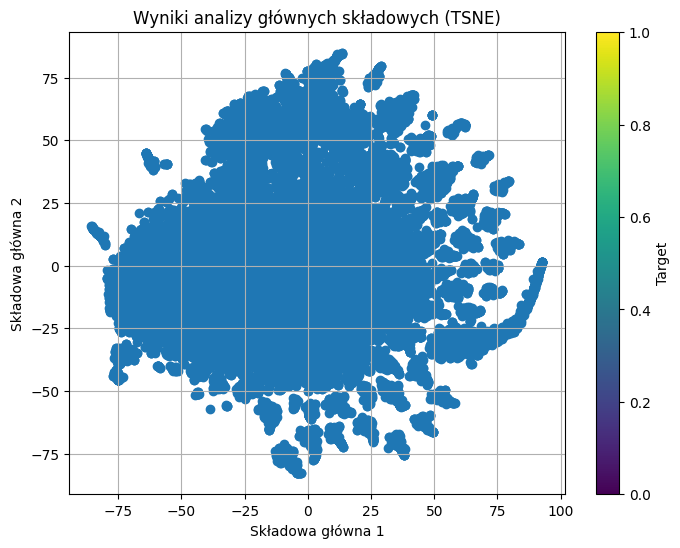